In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

# Checking the head values

In [49]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [51]:
#checking for null values
df.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [52]:
# The dataset has zero null values

In [53]:
df.shape

(5000, 14)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


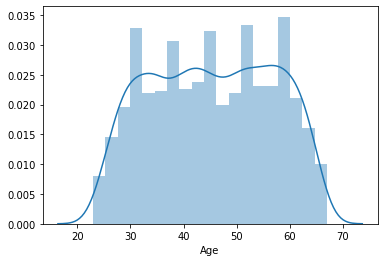

In [55]:
#Plots to see the distribution figures of age
sns.distplot(df['Age']);

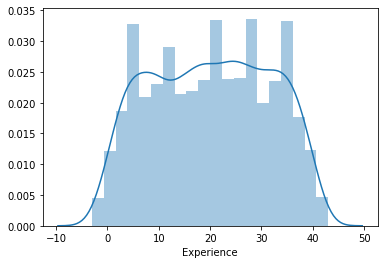

In [56]:
#Plots to see the distribution figures of experience
sns.distplot(df['Experience']);

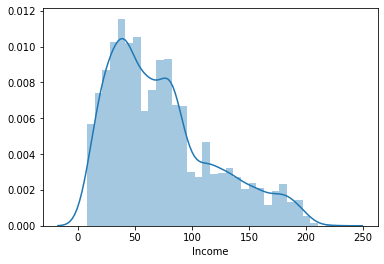

In [57]:
#Plots to see the distribution figures of income
sns.distplot(df['Income']);

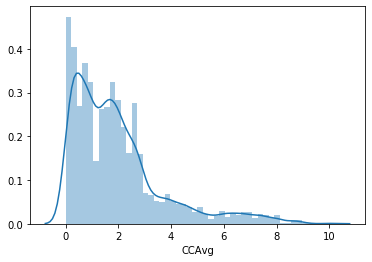

In [58]:
#Plots to see the distribution figures of average spending on credit cards
sns.distplot(df['CCAvg']);

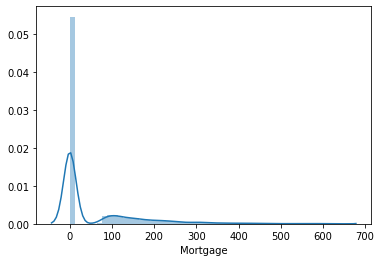

In [59]:
#Plots to see the distribution figures of mortgage
sns.distplot(df['Mortgage']);

-Age & Experince look quiet normally distributed, however income, ccavg, and mortgage are not normally distributed.

In [60]:
#Checking for skewness
df.skew(axis=0, skipna = True)

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

As we can see Income is highly skewed, while Age & Experience are negatively skewed.

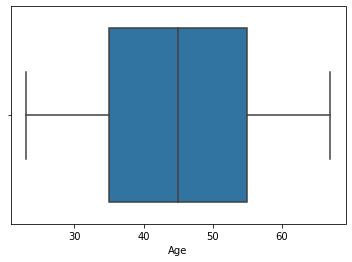

In [61]:
#checking for outliers for age
sns.boxplot(df.Age)

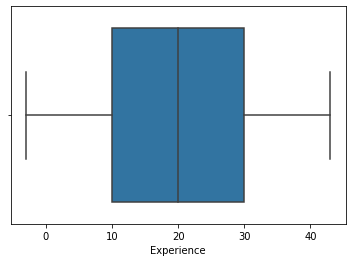

In [62]:
#checking for outliers for Experience
sns.boxplot(df.Experience)

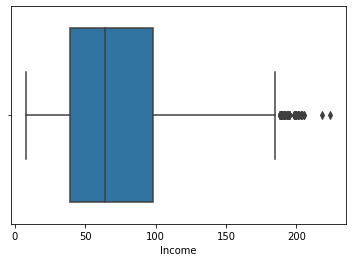

In [63]:
#checking for outliers for income
sns.boxplot(df.Income)

Income has more than a few outliers as seen above

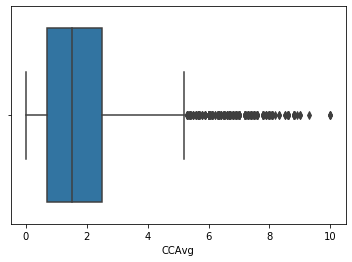

In [64]:
#checking for outliers for CCAvg
sns.boxplot(df.CCAvg)

CCAvg also has a lot of outliers

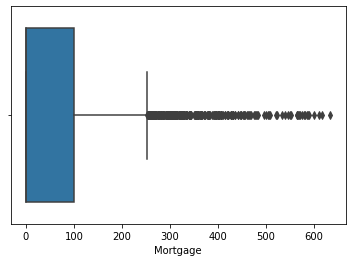

In [65]:
#checking for outliers for Mortgage
sns.boxplot(df.Mortgage)

Mortgage also has a lot number of outliers

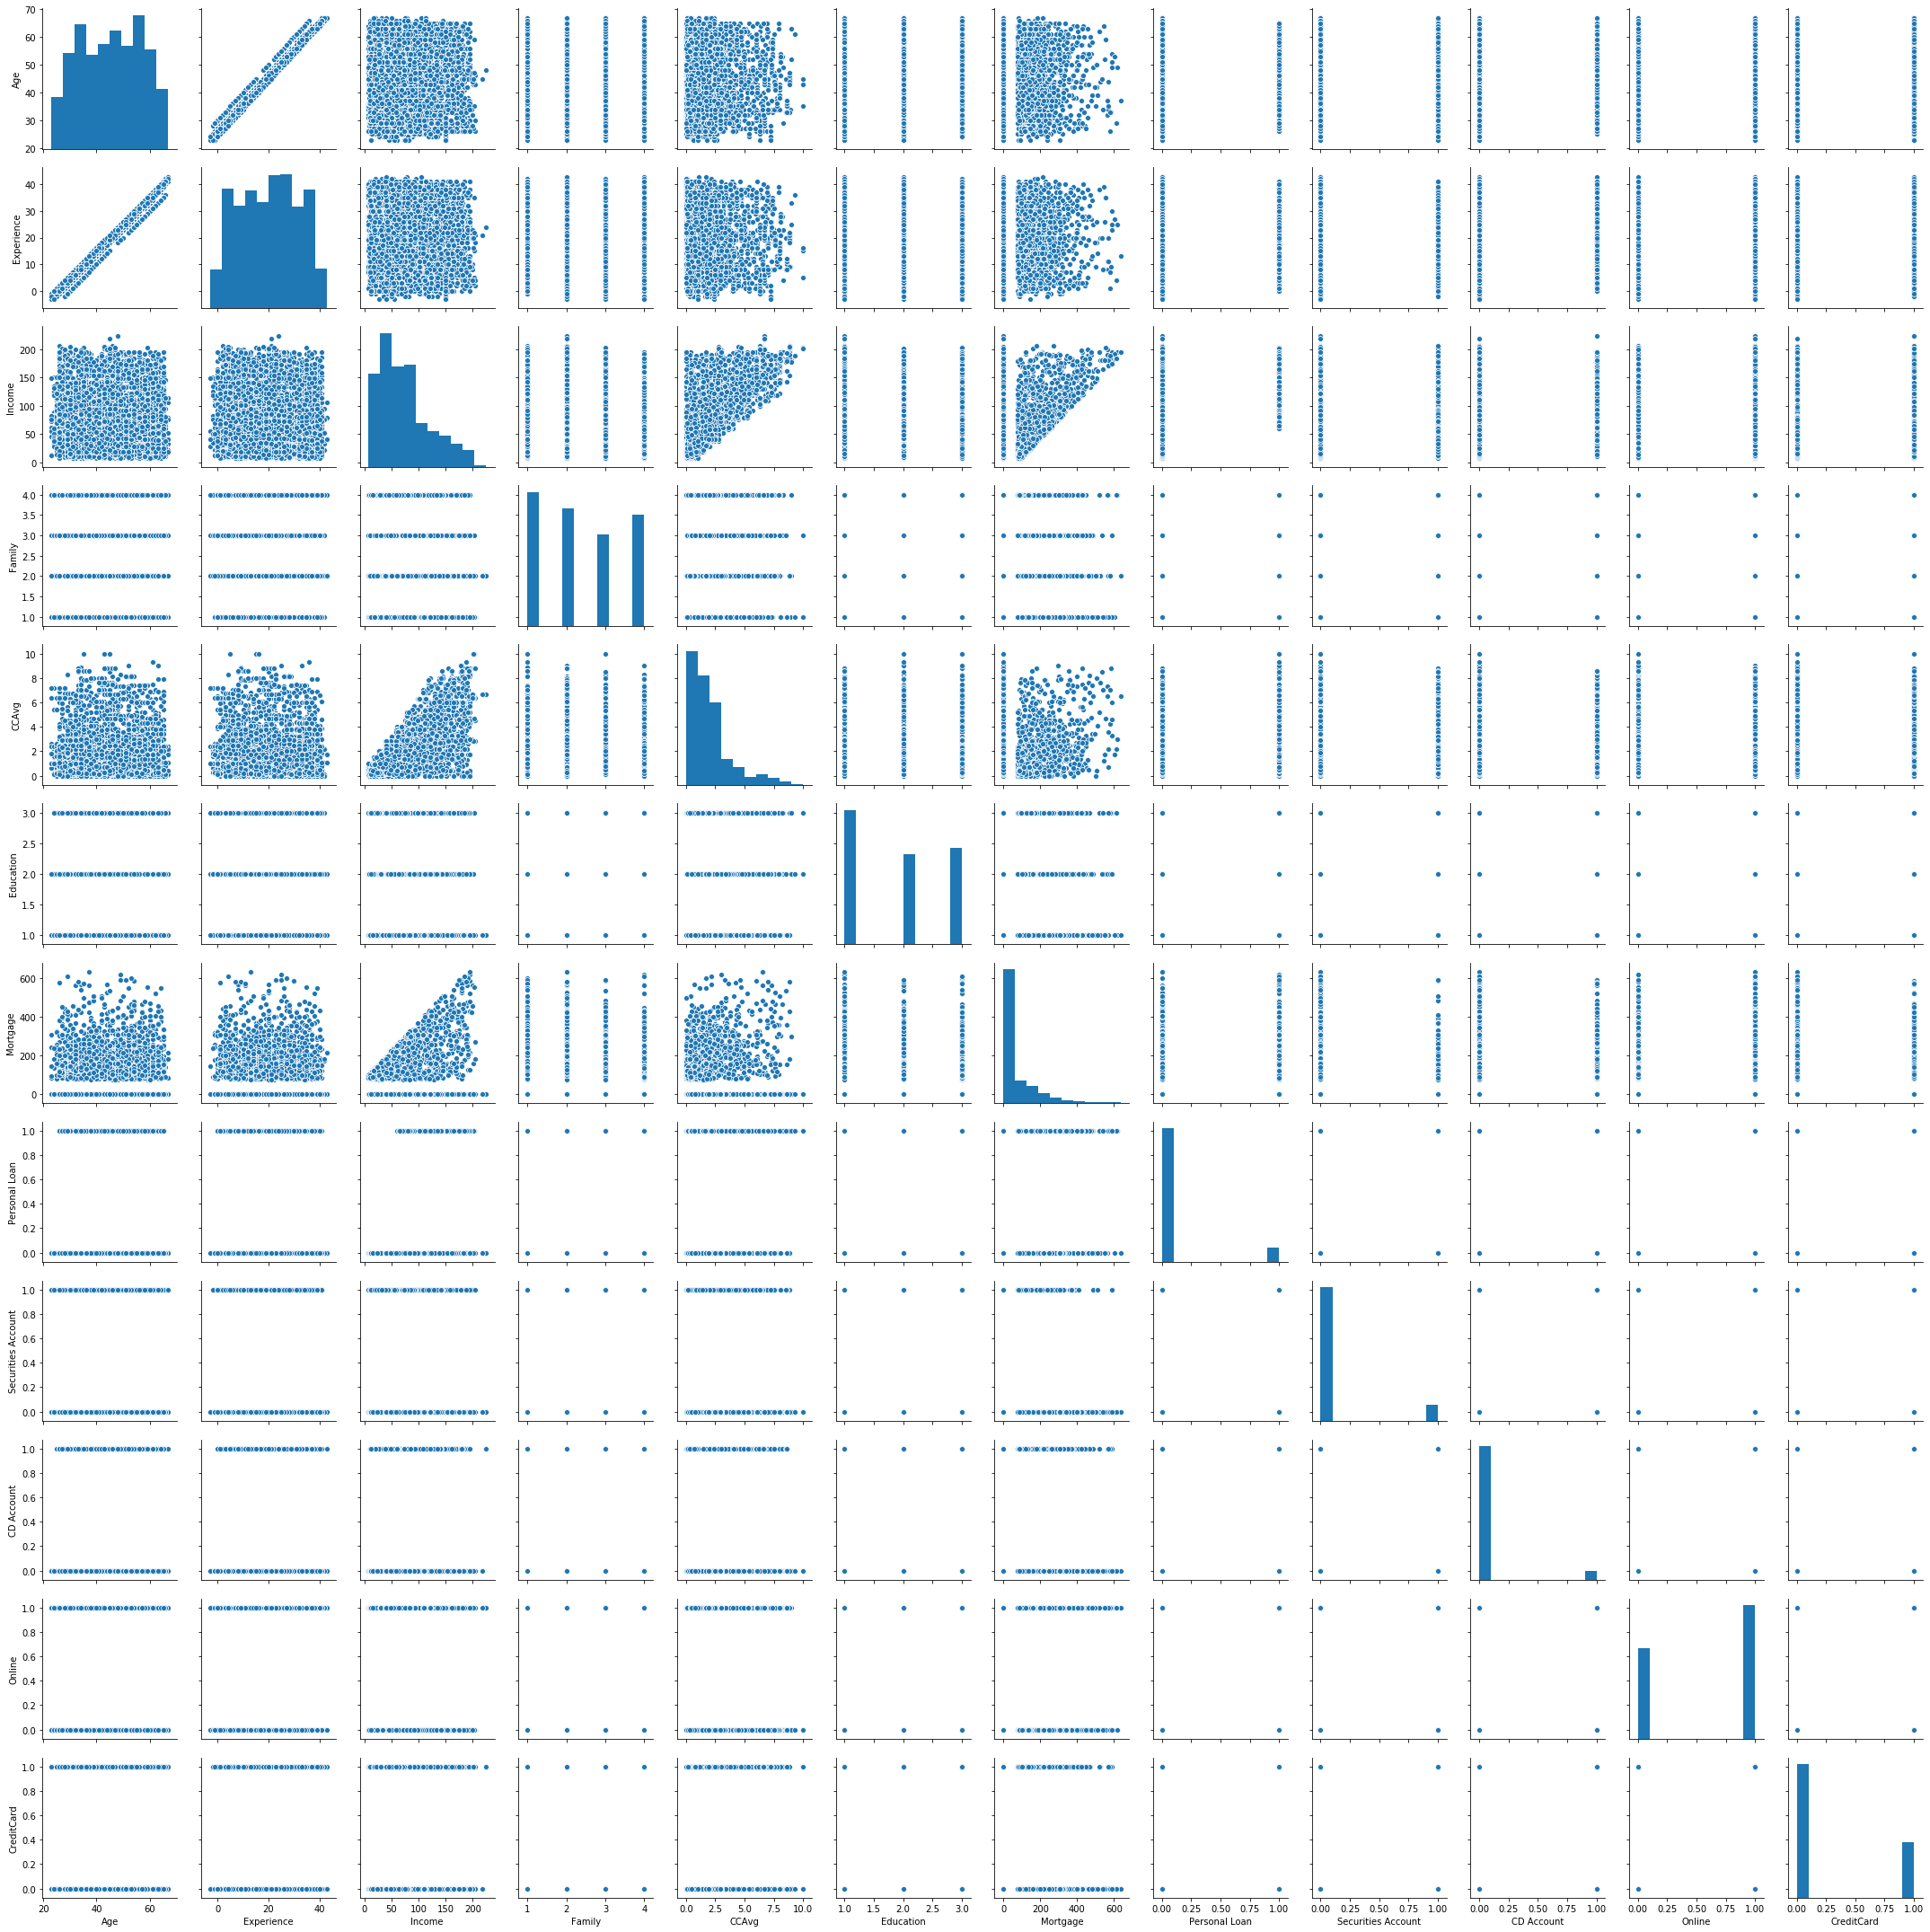

In [66]:
#pairplot that includes all the columns of the dataframe
dff = df[['Age', 'Experience', 'Income','Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]
sns.pairplot(dff)

In [67]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [68]:
dff.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [69]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


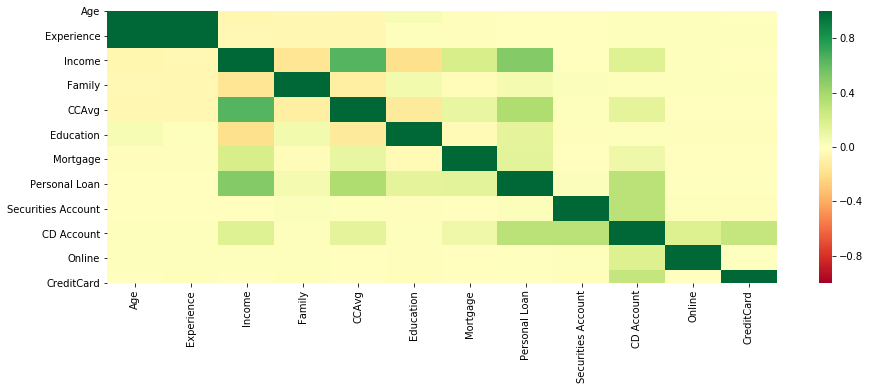

In [70]:
#Plotting the heatmap of correlation
corr = dff.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0)

# Logistic Regression

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [72]:
X = dff.iloc[:,:14]
y = dff['Personal Loan']
#Splitting the data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(3500, 12)
(1500, 12)


In [73]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [74]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [75]:
# import logistic regression and training data set
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
#predict personal loan of test data
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [77]:
#accuracy of this model's prediction
accuracy_score(y_test,y_pred)

1.0

In [78]:
#Classification Report
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00       157

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [79]:
#confusion matrix 
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1343,    0],
       [   0,  157]], dtype=int64)

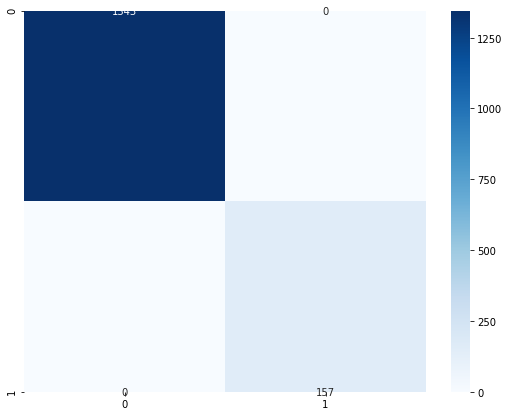

In [80]:
#confusion matrix with heatmap
plt.figure(figsize = (9,7))
sns.heatmap(conf_mat, annot=True,cmap='Blues', fmt='g')

# K Nearest Neighbours

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
#Running KNN model for k=3

knn = KNeighborsClassifier(n_neighbors = 3)

#fitting the model in train data

knn.fit(X_train, y_train)

#predicting the model with k=3

knn_pred = knn.predict(X_test)

#printing the accuracy

print(accuracy_score(y_test, knn_pred))

#Running KNN model for k=5

knn = KNeighborsClassifier(n_neighbors = 5)

#fitting the model in train data

knn.fit(X_train, y_train)

#predicting the model with k=5

knn_pred = knn.predict(X_test)

#printing the accuracy

print(accuracy_score(y_test, knn_pred))

#Running KNN model for k=9

knn = KNeighborsClassifier(n_neighbors = 9)

#fitting the model in train data

knn.fit(X_train, y_train)

#predicting the model with k=9

knn_pred = knn.predict(X_test)

#printing the accuracy

print(accuracy_score(y_test, knn_pred))


0.91
0.9073333333333333
0.9086666666666666


In [83]:
conf_mat1 = confusion_matrix(y_test, knn_pred)
conf_mat1

array([[1315,   28],
       [ 109,   48]], dtype=int64)

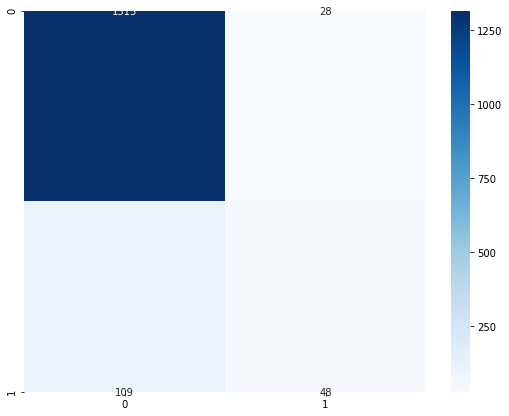

In [84]:
#confusion matrix with heatmap
plt.figure(figsize = (9,7))
sns.heatmap(conf_mat1, annot=True,cmap='Blues', fmt='g')

# Naive Bayes

In [85]:
#importing naive bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
#predicting the values
nb_predict = clf.predict(X_test)
nb_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [87]:
#printing the accuracy
accuracy_score(y_test, nb_predict, normalize = True)

1.0

We have once again got a perfect accuracy score of 1.0, same as we got in Logistic Regression.

In [88]:
conf_mat2 = confusion_matrix(y_test, nb_predict)
conf_mat2

array([[1343,    0],
       [   0,  157]], dtype=int64)

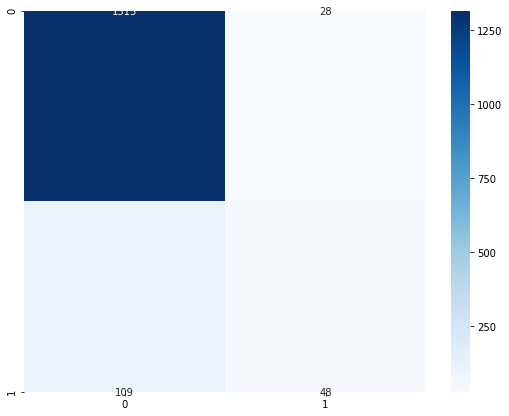

In [89]:
#confusion matrix with heatmap
plt.figure(figsize = (9,7))
sns.heatmap(conf_mat1, annot=True,cmap='Blues', fmt='g')

# Reasoning - Which one is the better model in this case

According to the accuracy score - Logistic Regression & Naive Bayes score way better than KNN. Both(Logistic Regression & Naive Bayes) score an accuracy of 1.0 or 100%, while KNN scores an accuracy of 0.91 when the value of k (n_neighbors) is put to 3, the accuracy of KNN goes a bit further down as the value of has been increased to 5 & 9.

Overall, I think Naive bayes is simple, fast, less time consuming and a more powerful algo as compared to the Logistic Regression. Naive Bayes deals well with missing & noisy data & is easy to obtain predicted probability, while Logistic Regression's classification constructs linear boundaries.